In [2]:
import matplotlib.pyplot as plt
from pandas.core.frame import DataFrame
import pandas as pd  
import numpy as np
import seaborn as sns

In [3]:
dataset = pd.read_csv("AccData_Repository.csv",names = ["time","acc"])
dataset.head()

,time,acc
0,07:40:54.493,0.953239
1,07:40:54.527,0.941747
2,07:40:54.564,0.945992
3,07:40:54.564,0.944917
4,07:40:54.598,0.954352


In [6]:
acc_list = np.array(dataset["acc"])
acc_time = np.array(dataset["time"])
acc_list = (acc_list - 1.0)*1000
acc_mean = np.mean(acc_list)
acc_std  = np.std(acc_list)
acc_mean_str = "{:.2f}".format(acc_mean)
acc_std_str = "{:.2f}".format(acc_std)
print("the acc dist mean:%.2fmg and std:%.2fmg" %(acc_mean,acc_std))

the acc dist mean:-52.95mg and std:5.89mg


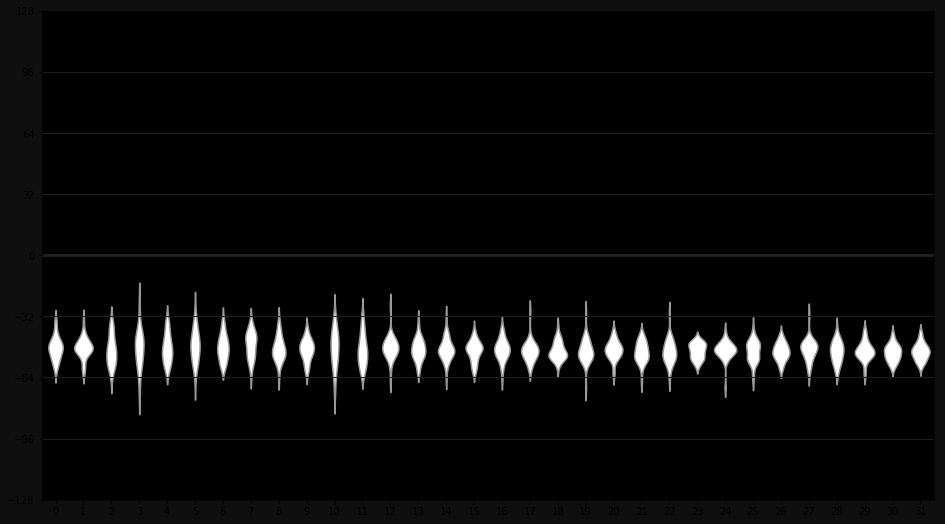

In [15]:
acc_min = -128
acc_max =  128
CONST_AXVLINE_COLOR = "#1f1f1f"
plt.figure(figsize=(16,9),facecolor='#0f0f0f',edgecolor='black')
plt.subplot(facecolor='k')
ax = plt.gca()#用于获取当前坐标轴的信息
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
#ax.spines['left'].set_color('white') 
ax.set_ylim(acc_min, acc_max)
plt.yticks([-128,-96,-64,-32,0,32,64,96,128])
#ax.grid(axis="y",color="#4f4f4f")
ax.axhline(y=0,color=CONST_AXVLINE_COLOR,linewidth=3)
ax.axhline(y=32,color=CONST_AXVLINE_COLOR,linewidth=1)
ax.axhline(y=-32,color=CONST_AXVLINE_COLOR,linewidth=1)
ax.axhline(y=64,color=CONST_AXVLINE_COLOR,linewidth=1)
ax.axhline(y=-64,color=CONST_AXVLINE_COLOR,linewidth=1)
ax.axhline(y=96,color=CONST_AXVLINE_COLOR,linewidth=1)
ax.axhline(y=-96,color=CONST_AXVLINE_COLOR,linewidth=1)
acc_slice = acc_list[:1024]
acc_frame = []
for k in range(len(acc_slice)):
    acc_frame.append(int(k/32))
df = pd.DataFrame()
df["frame"]= acc_frame
df["acc"] = acc_slice
sns.violinplot(y=acc_slice,x=acc_frame,split=True,color="white",inner=None)
plt.show()